# Left-Right symmetric model Lagrangian

In [1]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [90]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0', real=True)
deltaR0 = symbols(r'\delta_R^0') ####### debe de ser complejo por que tiene un vev complejo

In [91]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

In [92]:
DeltaL, DeltaR

⎛⎡√2⋅\delta_L__+                  ⎤  ⎡√2⋅\delta_R__+                  ⎤⎞
⎜⎢──────────────   \delta_L__{++} ⎥  ⎢──────────────   \delta_R__{++} ⎥⎟
⎜⎢      2                         ⎥  ⎢      2                         ⎥⎟
⎜⎢                                ⎥, ⎢                                ⎥⎟
⎜⎢                -√2⋅\delta_L__+ ⎥  ⎢                -√2⋅\delta_R__+ ⎥⎟
⎜⎢ \delta_L__0    ────────────────⎥  ⎢ \delta_R__0    ────────────────⎥⎟
⎝⎣                       2        ⎦  ⎣                       2        ⎦⎠

In [93]:
from sympy import sin, cos

In [94]:
vL, vR, vRr, vRi, theta = symbols(r'v_L, v_R, v_{Rr}, v_{Ri}, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:(vRr + I*vRi)/sqrt2, deltaRp:0, deltaRpp:0}
vRri = {vRr:vR*cos(theta), vRi: vR*sin(theta)}
DeltaL.subs(vevL), DeltaR.subs(vevR)

⎛⎡  0     0⎤  ⎡          0             0⎤⎞
⎜⎢         ⎥  ⎢                         ⎥⎟
⎜⎢√2⋅v_L   ⎥, ⎢√2⋅(ⅈ⋅v_{Ri} + v_{Rr})   ⎥⎟
⎜⎢──────  0⎥  ⎢──────────────────────  0⎥⎟
⎝⎣  2      ⎦  ⎣          2              ⎦⎠

In [95]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    #conjugate(WLp):WLm,
    #conjugate(WLm):WLp,
    #conjugate(WRm):WRp,
    #conjugate(WRp):WRm
}

### Bidoublet

In [96]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

In [97]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

⎡\phi⁰₁  \phi⁺₁⎤
⎢              ⎥
⎣\phi⁻₂  \phi⁰₂⎦

In [98]:
k1, k2, k1r, k1i, alpha = symbols(r"k_1, k_2, k_{1r}, k_{1i}, \alpha", positive=True)
vevPhi = {phi10:(k1r + I*k1i)/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2m:0, phi2p:0, phi1m:0}
k1ri = {k1r:k1*cos(alpha), k1i: k1*sin(alpha)}
Phi.subs(vevPhi)

⎡√2⋅(ⅈ⋅k_{1i} + k_{1r})       ⎤
⎢──────────────────────    0  ⎥
⎢          2                  ⎥
⎢                             ⎥
⎢                        √2⋅k₂⎥
⎢          0             ─────⎥
⎣                          2  ⎦

## Scalar potential and Higgs mass spectrum

In [99]:
from sympy.physics.quantum import Dagger
from sympy import solve

In [100]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

In [101]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2)).subs(conjugate_scalarsPhi)
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

⎡       ______                         ______                ⎤
⎢\phi⁰₁⋅\phi⁰₁ + \phi⁺₂⋅\phi⁻₂  \phi⁺₁⋅\phi⁰₁ + \phi⁺₂⋅\phi⁰₂⎥
⎢                                                            ⎥
⎢                       ______                         ______⎥
⎣\phi⁻₁⋅\phi⁰₁ + \phi⁻₂⋅\phi⁰₂  \phi⁺₁⋅\phi⁻₁ + \phi⁰₂⋅\phi⁰₂⎦

⎡______          ⎤
⎢\phi⁰₂   -\phi⁺₂⎥
⎢                ⎥
⎢         ______ ⎥
⎣-\phi⁻₁  \phi⁰₁ ⎦

⎡                 ______ ______                                ⎤
⎢-\phi⁻₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂                0               ⎥
⎢                                                              ⎥
⎢                                                 ______ ______⎥
⎣              0                 -\phi⁻₁⋅\phi⁺₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡\phi⁰₂   -\phi⁺₁⎤
⎢                ⎥
⎣-\phi⁻₂  \phi⁰₁ ⎦

⎡-\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂                0               ⎤
⎢                                                              ⎥
⎣              0                 -\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂⎦

⎡                       ______         ______                ⎤
⎢\phi⁺₁⋅\phi⁻₁ + \phi⁰₁⋅\phi⁰₁  \phi⁺₁⋅\phi⁰₂ + \phi⁰₁⋅\phi⁺₂⎥
⎢                                                            ⎥
⎢                       ______                         ______⎥
⎣\phi⁻₁⋅\phi⁰₂ + \phi⁻₂⋅\phi⁰₁  \phi⁺₂⋅\phi⁻₂ + \phi⁰₂⋅\phi⁰₂⎦

⎡-\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂                0               ⎤
⎢                                                              ⎥
⎣              0                 -\phi⁺₁⋅\phi⁻₂ + \phi⁰₁⋅\phi⁰₂⎦

In [102]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(deltaRmm):deltaRpp
}

In [103]:
DeltaL

⎡√2⋅\delta_L__+                  ⎤
⎢──────────────   \delta_L__{++} ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_L__+ ⎥
⎢ \delta_L__0    ────────────────⎥
⎣                       2        ⎦

In [104]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

⎡√2⋅\delta_L__-                  ⎤
⎢──────────────    \delta_L__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_L__- ⎥
⎢\delta_L__{--}  ────────────────⎥
⎣                       2        ⎦

In [105]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

⎡√2⋅\delta_R__-    ___________   ⎤
⎢──────────────    \delta_R__0   ⎥
⎢      2                         ⎥
⎢                                ⎥
⎢                -√2⋅\delta_R__- ⎥
⎢\delta_R__{--}  ────────────────⎥
⎣                       2        ⎦

In [106]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

⎡  \delta_L__+⋅\delta_L__-                                     √2⋅\delta_L__+⋅
⎢  ─────────────────────── + \delta_L__{++}⋅\delta_L__{--}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢  √2⋅\delta_L__+⋅\delta_L__{--}   √2⋅\delta_L__-⋅\delta_L__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
a_L__+⋅\delta_L__-              2          ⎥
────────────────── + \delta_L__0           ⎥
      2                                    ⎦

⎡           2                                                                 
⎢\delta_L__+                                                                  
⎢──────────── + \delta_L__0⋅\delta_L__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__+                       
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
L__{++}⎥
       ⎦

⎡          \delta_L__+⋅\delta_L__-              2              √2⋅\delta_L__+⋅
⎢          ─────────────────────── + \delta_L__0             - ───────────────
⎢                     2                                                    2  
⎢                                                                             
⎢√2⋅\delta_L__+⋅\delta_L__{--}   √2⋅\delta_L__-⋅\delta_L__0    \delta_L__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

\delta_L__0   √2⋅\delta_L__-⋅\delta_L__{++}⎤
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
lta_L__-                                   ⎥
──────── + \delta_L__{++}⋅\delta_L__{--}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_L__-                                                                  
⎢──────────── + \delta_L__0⋅\delta_L__{--}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_L__-                       
⎢                    0                      ──────────── + \delta_L__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
L__{--}⎥
       ⎦

In [107]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

⎡                                                                             
⎢  \delta_R__+⋅\delta_R__-                                     √2⋅\delta_R__+⋅
⎢  ─────────────────────── + \delta_R__{++}⋅\delta_R__{--}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢  √2⋅\delta_R__+⋅\delta_R__{--}   √2⋅\delta_R__-⋅\delta_R__0      \delta_R__+
⎢- ───────────────────────────── + ──────────────────────────      ───────────
⎣                2                             2                              

___________                                ⎤
\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎥
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
⋅\delta_R__-               ___________     ⎥
──────────── + \delta_R__0⋅\delta_R__0     ⎥
2                                          ⎦

⎡           2                                                                 
⎢\delta_R__+                                                                  
⎢──────────── + \delta_R__0⋅\delta_R__{++}                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__+                       
⎢                    0                      ──────────── + \delta_R__0⋅\delta_
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
R__{++}⎥
       ⎦

⎡                                                                             
⎢    \delta_R__+⋅\delta_R__-               ___________         √2⋅\delta_R__+⋅
⎢    ─────────────────────── + \delta_R__0⋅\delta_R__0       - ───────────────
⎢               2                                                          2  
⎢                                                                             
⎢√2⋅\delta_R__+⋅\delta_R__{--}   √2⋅\delta_R__-⋅\delta_R__0    \delta_R__+⋅\de
⎢───────────────────────────── - ──────────────────────────    ───────────────
⎣              2                             2                            2   

___________                                ⎤
\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎥
─────────── + ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
lta_R__-                                   ⎥
──────── + \delta_R__{++}⋅\delta_R__{--}   ⎥
                                           ⎦

⎡           2                                                                 
⎢\delta_R__-                   ___________                                    
⎢──────────── + \delta_R__{--}⋅\delta_R__0                      0             
⎢     2                                                                       
⎢                                                                             
⎢                                                      2                      
⎢                                           \delta_R__-                   ____
⎢                    0                      ──────────── + \delta_R__{--}⋅\del
⎣                                                2                            

       ⎤
       ⎥
       ⎥
       ⎥
       ⎥
       ⎥
_______⎥
ta_R__0⎥
       ⎦

### Higgs potential

In [108]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [109]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhiPhitildeDagger)*trace(DeltaLDeltaLDagger) + trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) ####checar
        + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) + trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger)
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

In [110]:
vevPhi

In [111]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

In [49]:
from sympy import re, im

In [53]:
VLRPhi_vev_re = re(VLRPhi_vev.expand())
VLRPhi_vev_im = im(VLRPhi_vev.expand())

In [62]:
VLRPhi_vev_re.diff(k1r).subs(k1i, 0 ).subs(k1ri).subs(vRri).trigsimp()

In [117]:
VLRPhi_vev.coeff(alpha2).diff(k1r).expand().subs(vRri).simplify()

In [134]:
VLRPhi_vev.diff(k1r).subs(k1ri).subs(vRri).expand().collect([alpha1, alpha2, lamb1, lamb2, lamb3, lamb4, beta1, beta2], lambda x:x.simplify().subs(cos(alpha)**2, (1 + cos(2*alpha))/2).factor())

In [126]:
((cos(alpha)**2) - (1 + cos(2*alpha))/2).trigsimp()

In [81]:
trace(PhiDagger)*(
    trace(DeltaLDeltaLDagger) +
    trace(DeltaRDeltaRDagger) 
).subs(vevL).subs(vevR).subs(vevPhi)

In [88]:
DeltaRDeltaRDagger

⎡  \delta_R__+⋅\delta_R__-                                     √2⋅\delta_R__+⋅
⎢  ─────────────────────── + \delta_R__{++}⋅\delta_R__{--}     ───────────────
⎢             2                                                            2  
⎢                                                                             
⎢  √2⋅\delta_R__+⋅\delta_R__{--}   √2⋅\delta_R__-⋅\delta_R__0            \delt
⎢- ───────────────────────────── + ──────────────────────────            ─────
⎣                2                             2                              

\delta_R__0   √2⋅\delta_R__-⋅\delta_R__{++}⎤
─────────── - ─────────────────────────────⎥
                            2              ⎥
                                           ⎥
a_R__+⋅\delta_R__-              2          ⎥
────────────────── + \delta_R__0           ⎥
      2                                    ⎦

In [87]:
(deltaR0**2).subs(vevR).expand().subs(vRri).simplify()

In [63]:
tadpole1 = VLRPhi_vev.diff(k1r).subs(k1i, 0 ).subs(k1ri).subs(vRri).simplify()
tadpole1

In [184]:
scalar_vevs = [k1r, k1i, k2, vRr, vRi, vL]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).simplify()
    tadpoles_relations[vev] = tadpoles_relations[vev].subs(vRri).subs(k1ri).collect([k1, k2, vR, vL], factor)

In [185]:
from sympy import Symbol

In [186]:
for vev, exp in tadpoles_relations.items():
    display(vev)
    display(exp.atoms(Symbol))
    #display(exp)

In [ ]:
tadpole1 = tadpoles_relations[k1r]#.subs(k2, k1)
tadpole2 = tadpoles_relations[k1i]#.subs(k2, k1)


In [192]:
tadpole1

In [ ]:

tadpole12_sol = solve([tadpole1, tadpole2], [mu12, mu22], dict=True)[0]

In [188]:
from sympy import trigsimp

In [189]:
for param in tadpole12_sol:
    tadpole12_sol[param] = tadpole12_sol[param].collect([k1, k2, vR, vL], trigsimp)

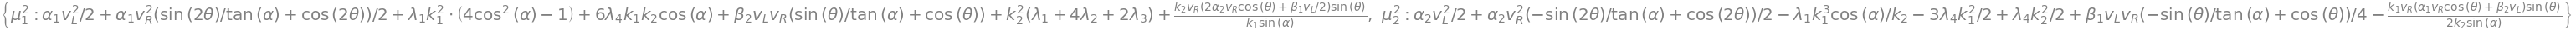

In [190]:
tadpole12_sol

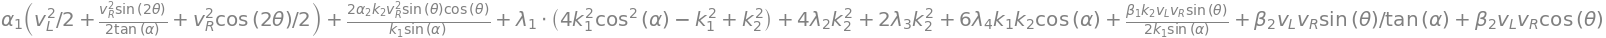

In [191]:
tadpole12_sol[mu12].expand().collect([lamb1, alpha1, lamb4, beta1])

In [107]:
display(
    tadpoles_relations[k2].subs(tadpole12_sol).atoms(Symbol),
    tadpoles_relations[vL].atoms(Symbol)
)

In [108]:
display(
    tadpoles_relations[vRr].atoms(Symbol),
    tadpoles_relations[vRi].atoms(Symbol)
)

In [153]:
tadpoles_relations[vRr]

In [156]:
mu32_sol = solve(tadpoles_relations[vL], mu32, dict=True)[0]
mu32_sol

In [160]:
mu32_sol[mu32].subs(k2, k1).collect(k1, trigsimp)

In [163]:
display(
    tadpoles_relations[vRr].subs(mu32_sol).atoms(Symbol),
    tadpoles_relations[vRi].subs(mu32_sol).atoms(Symbol)
)

In [166]:
tadpole3 = tadpoles_relations[vRr].subs(mu32_sol)
tadpole4 = tadpoles_relations[vRi].subs(mu32_sol)

In [168]:
tadpole3.subs(k2, k1).expand().collect(k1)

In [ ]:

tadpole34_sol = solve([tadpole3, tadpole4], [beta2, rho1], dict=True)[0]

In [ ]:
tadpole34_sol

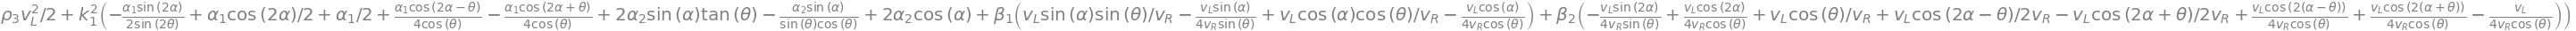

In [133]:
tadpole34_sol[mu32].subs(k2, k1).collect(k1, lambda x: x.collect([beta1, beta2]))

In [139]:
tadpole4.subs(k2, k1).expand().collect(k1, lambda x: x.collect([beta1, beta2]))

In [111]:
display(
    tadpoles_relations[k2].subs(tadpole12_sol).atoms(Symbol),
    tadpoles_relations[vL].subs(tadpole34_sol).atoms(Symbol)
)

In [150]:
tadpoles_relations[vRr].subs(k2, k1).expand().collect(k1)

In [112]:
tadpole5 = tadpoles_relations[k2].subs(tadpole12_sol)#.collect([k1, k2, vR, vL], factor)
tadpole6 = tadpoles_relations[vL].subs(tadpole34_sol)#.collect([k1, k2, vR, vL], factor)
#tadpole34_sol = solve([tadpole3, tadpole4], [mu32, rho1], dict=True)[0]

In [128]:
tadpole5.subs(k2, k1).subs(alpha, theta).factor()

KeyboardInterrupt: 

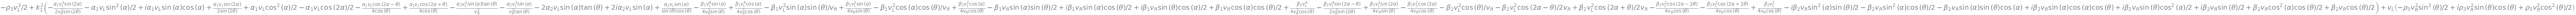

In [125]:
tadpole6.subs(k2, k1).expand().collect([k1, vL , vR], lambda x: x.collect([theta, alpha]))

## Caso $k_2=k_1$

In [284]:
tadpole12_sol_k2eqk1 = {}
for parameter in tadpole12_sol:
    tadpole12_sol_k2eqk1[parameter] = tadpole12_sol[parameter].subs(k2, k1).factor()

tadpole34_sol_k2eqk1 = {}
for parameter in tadpole34_sol:
    tadpole34_sol_k2eqk1[parameter] = tadpole34_sol[parameter].subs(k2, k1).factor()

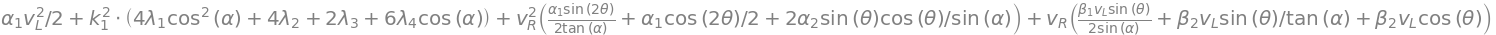

In [285]:
tadpole12_sol_k2eqk1[mu12].expand().collect(
    [k1, k2, vR, vL]#, lambda x: x.collect([lamb1, lamb2, lamb3, lamb4], factor)
)

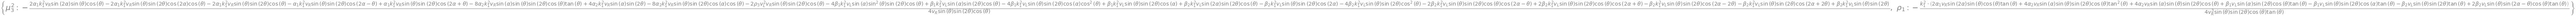

In [286]:
tadpole34_sol_k2eqk1

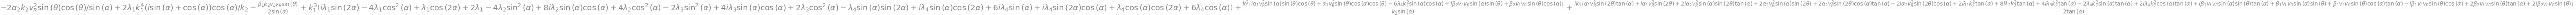

In [287]:
tadpol5_k2eqk1 = tadpole5.subs(k2, k1).subs(tadpole12_sol).subs(tadpole34_sol).expand().collect([k1, vL, vR], factor)
tadpol5_k2eqk1

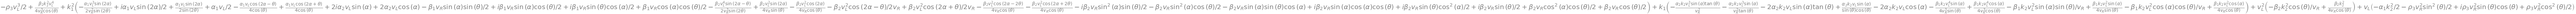

In [288]:
tadpol6_k2eqk1 = tadpole6.subs(k2, k1).subs(tadpole12_sol).subs(tadpole34_sol).expand().collect([k1, vL, vR])
tadpol6_k2eqk1

### sub case $\alpha = \theta$

In [289]:
from sympy import trigsimp, simplify

In [290]:
tadpole12_sol_alphaeqtheta = {}
for parameter in tadpole12_sol_k2eqk1:
    tadpole12_sol_alphaeqtheta[parameter] = tadpole12_sol_k2eqk1[parameter].subs(theta, alpha).collect([k1, vR, vL], trigsimp)

tadpole34_sol_alphaeqtheta = {}
for parameter in tadpole34_sol_k2eqk1:
    tadpole34_sol_alphaeqtheta[parameter] = tadpole34_sol_k2eqk1[parameter].subs(theta, alpha).collect([k1, vR, vL], trigsimp)

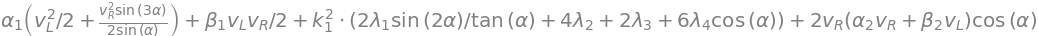

In [291]:
tadpole12_sol_alphaeqtheta[mu12].expand().collect([k1, alpha1, beta1], simplify)

In [182]:
tadpole12_sol_alphaeqtheta[mu22].expand().collect([k1, alpha1, beta1], simplify)

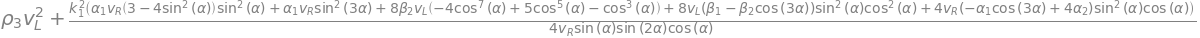

In [183]:
tadpole34_sol_alphaeqtheta[mu32].expand().collect([k1, alpha1, beta1], simplify)

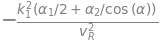

In [184]:
tadpole34_sol_alphaeqtheta[rho1].expand().collect([k1, alpha1, beta1], simplify)

In [185]:
tadpole5_alphaeqtheta = tadpol5_k2eqk1.subs(alpha, theta).collect([k1, vR, vL], trigsimp)
tadpole5_alphaeqtheta

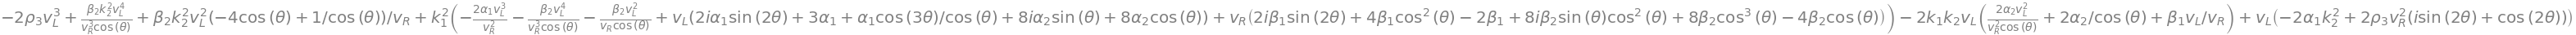

In [186]:
tadpole6_alphaeqtheta = tadpol6_k2eqk1.subs(alpha, theta).collect([k1, vR, vL], trigsimp)
tadpole6_alphaeqtheta

### sub case $\beta_1 = \beta_2 = 0$

In [406]:
tadpole12_sol_betai_zero = {}
for parameter in tadpole12_sol_k2eqk1:
    tadpole12_sol_betai_zero[parameter] = tadpole12_sol_k2eqk1[parameter].subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)

tadpole34_sol_betai_zero = {}
for parameter in tadpole34_sol_k2eqk1:
    tadpole34_sol_betai_zero[parameter] = tadpole34_sol_k2eqk1[parameter].subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)

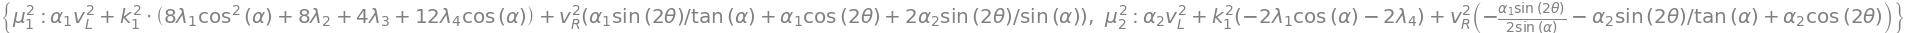

In [407]:
tadpole12_sol_betai_zero

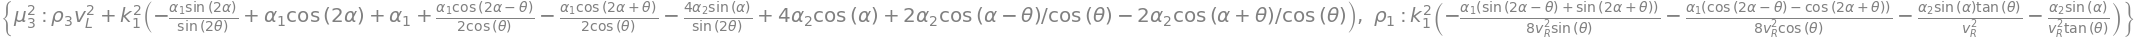

In [408]:
tadpole34_sol_betai_zero

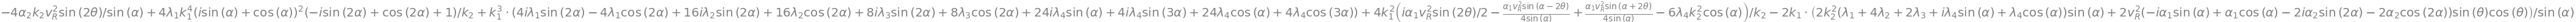

In [409]:
tadpole5_betai_zero = tadpol5_k2eqk1.subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL], trigsimp)
tadpole5_betai_zero

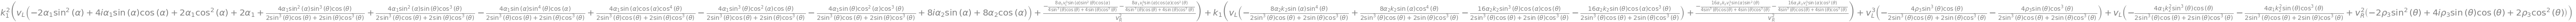

In [414]:
tadpole6_betai_zero = tadpol6_k2eqk1.subs(beta2, beta1).subs(beta1, 0).collect([k1, vR, vL])
tadpole6_betai_zero

In [413]:
vevPhi[phi10].subs(k1ri)

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [98]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (phi10r + I*phi10i)/sqrt2,
    phi20: (phi20r + I*phi20i)/sqrt2,
    deltaR0: (deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (deltaL0r + I*deltaL0i)/sqrt2
}

In [99]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

In [356]:
tadpol1 = VLRPhi.subs(phi10, (phi10r + I*phi10i)/sqrt2).diff(phi10r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi10r: k1, phi10i: 0
    }
)
display(tadpol1)
tadpol2 = VLRPhi.subs(phi20, (phi20r + I*phi20i)/sqrt2).diff(phi20r).subs(vevPhi).subs(vevL).subs(vevR).subs(
    {
        phi20r: k2, phi20i: 0
    }
)
tadpol2

In [101]:
tadpol3 = VLRPhi.subs(deltaR0, (deltaR0r + I*deltaR0i)/sqrt2).diff(deltaR0r).subs(vevR).subs(vevPhi).subs(vevL).subs(
    {
        deltaR0r: vR, deltaR0i: 0
    }
)
display(tadpol3)
tadpol4 = VLRPhi.subs(deltaL0, (deltaL0r + I*deltaL0i)/sqrt2).diff(deltaL0r).subs(vevL).subs(vevPhi).subs(vevR).subs(
    {
        deltaL0r: vL, deltaL0i: 0
    }
)
tadpol4

In [102]:
tadpole12_sol = solve([tadpol1, tadpol2], [mu12, mu22], dict=True)[0]

In [128]:
tadpole12_sol

In [134]:
tadpole34_sol = solve([tadpol3, tadpol4], [mu32, rho1], dict=True)[0]

In [135]:
tadpole34_sol

# Scalar ms

In [136]:
caso_k1k2_vL = {k2:k1, kp_square:2*k1**2, km_square:0}

In [137]:
for mu in tadpole12_sol:
    tadpole12_sol[mu] = tadpole12_sol[mu].subs(caso_k1k2_vL).collect(k1, factor)

for mu in tadpole34_sol:
    tadpole34_sol[mu] = tadpole34_sol[mu].subs(caso_k1k2_vL).collect(k1, factor)

In [138]:
tadpole12_sol

In [139]:
tadpole34_sol

In [140]:
VLRPhi_ri_tadpole = VLRPhi_ri.subs(caso_k1k2_vL).subs(tadpole12_sol).subs(mu32, tadpole34_sol[mu32])
VLRPhi_ri_tadpole

In [141]:
Phi.subs(complex_scalar_fields)

⎡√2⋅(ⅈ⋅\phi_1__{0i} + \phi_1__{0r})                                    ⎤
⎢──────────────────────────────────                \phi⁺₁              ⎥
⎢                2                                                     ⎥
⎢                                                                      ⎥
⎢                                    √2⋅(ⅈ⋅\phi_2__{0i} + \phi_2__{0r})⎥
⎢              \phi⁻₂                ──────────────────────────────────⎥
⎣                                                    2                 ⎦

In [142]:
vevPhi[phi10r] = k1
vevPhi[phi10i] = 0
vevPhi[phi20r] = k2
vevPhi[phi20i] = 0

In [143]:
DeltaL.subs(complex_scalar_fields)

⎡            √2⋅\delta_L__+                              ⎤
⎢            ──────────────               \delta_L__{++} ⎥
⎢                  2                                     ⎥
⎢                                                        ⎥
⎢√2⋅(ⅈ⋅\delta_L__{0i} + \delta_L__{0r})  -√2⋅\delta_L__+ ⎥
⎢──────────────────────────────────────  ────────────────⎥
⎣                  2                            2        ⎦

In [144]:
vevL[deltaL0r] = vL
vevL[deltaL0i] = 0
vevR[deltaR0r] = vR
vevR[deltaR0i] = 0

In [ ]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields
MRI_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phiri_fields), phiri_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify()
MRI_square

⎡                                               2              2              
⎢                                    \alpha₁⋅v_L    \alpha₁⋅v_R               
⎢                                    ──────────── - ──────────── + \lambda₁⋅k₁
⎢                                         4              4                    
⎢                                                                             
⎢                            2              2                 2               
⎢                 \alpha₂⋅v_L    \alpha₂⋅v_R    √2⋅\lambda₁⋅k₁               2
⎢                 ──────────── - ──────────── - ─────────────── + \lambda₁⋅k₁ 
⎢                      2              2                4                      
⎢                                                                             
⎢                                                                             
⎢                                                                      k₁⋅(2⋅\
⎢                                                   

In [164]:
MRI_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0).applyfunc(lambda x: x.collect(k1, factor))

⎡                                 2     2                                     
⎢                      \alpha₁⋅v_R    k₁ ⋅(2⋅\lambda₁ + 4⋅\lambda₂ + 2⋅\lambda
⎢                    - ──────────── + ────────────────────────────────────────
⎢                           4                                           2     
⎢                                                                             
⎢                2     2                                                      
⎢     \alpha₂⋅v_R    k₁ ⋅(-4⋅\lambda₁ + √2⋅\lambda₁ - 16⋅\lambda₂ + 8⋅√2⋅\lamb
⎢   - ──────────── - ─────────────────────────────────────────────────────────
⎢          2                                                            4     
⎢                                                                             
⎢                                                                             
⎢                                                 k₁⋅v_R⋅(\alpha₁ + 2⋅\alpha₂)
⎢                                                 ──

In [151]:
vevL

In [152]:
vevL[deltaLmm] = 0
vevL[deltaRmm] = 0
vevL[deltaLm] = 0
vevL[deltaRm] = 0

In [155]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]
phim_fields = [phi1m, phi2m, deltaRm, deltaLm]
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phim_fields), phip_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify()
Mp_square

⎡           2              2                                                  
⎢\alpha₁⋅v_L    \alpha₁⋅v_R                  2                2               
⎢──────────── - ──────────── - √2⋅\lambda₄⋅k₁  + 2⋅\lambda₄⋅k₁                
⎢     2              2                                                        
⎢                                                                             
⎢                                                                           2 
⎢                                                                \alpha₁⋅v_L  
⎢                              0                                 ──────────── 
⎢                                                                     2       
⎢                                                                             
⎢                                                                             
⎢                     √2⋅k₁⋅v_L⋅(-β₁ - β₂)                                    
⎢                     ────────────────────          

In [191]:
Mp_square.subs(beta2, beta1).subs(beta1, 0)#.subs(vL, 0)

⎡           2              2                                                  
⎢\alpha₁⋅v_L    \alpha₁⋅v_R                  2                2               
⎢──────────── - ──────────── - √2⋅\lambda₄⋅k₁  + 2⋅\lambda₄⋅k₁                
⎢     2              2                                                        
⎢                                                                             
⎢                                                                           2 
⎢                                                                \alpha₁⋅v_L  
⎢                              0                                 ──────────── 
⎢                                                                     2       
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                              0                    

In [180]:
Pp, Dp = Mp_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0).tomatrix().diagonalize()

In [181]:
Pp

⎡0  1  0  0⎤
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣1  0  0  0⎦

In [184]:
Ppinv = Pp.inv()
Ppinv

⎡0  0  0  1⎤
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  1  0⎦

In [185]:
Pp*Ppinv

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [182]:
Dp

⎡ ⎛            2               2            2⎞                                
⎢-⎝2⋅\alpha₁⋅k₁  + 4⋅\alpha₂⋅k₁  + \rho₃⋅v_R ⎠                                
⎢──────────────────────────────────────────────                          0    
⎢                      2                                                      
⎢                                                                             
⎢                                                             2               
⎢                                                  \alpha₁⋅v_R                
⎢                      0                         - ──────────── - √2⋅\lambda₄⋅
⎢                                                       2                     
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                      0                            

In [187]:
Ppinv*Dp*Pp

⎡            2               2            2            2                      
⎢- \alpha₁⋅k₁  - 2⋅\alpha₂⋅k₁  + \rho₁⋅v_R  - \rho₃⋅v_R                       
⎢                                                                             
⎢                                                          ⎛            2     
⎢                                                         -⎝2⋅\alpha₁⋅k₁  + 4⋅
⎢                           0                             ────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                           0                                                 
⎢                                                                             
⎢                                                   

In [159]:
phipp_fields = [deltaRpp, deltaLpp]
phippc_fields = [deltaRmm, deltaLmm]
Mpp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole, phippc_fields), phipp_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(caso_k1k2_vL).simplify().applyfunc(lambda x: x.collect([vL, vR], factor))
Mpp_square

⎡           2        2                                                    2   
⎢  \rho₃⋅v_L    √2⋅k₁ ⋅v_L⋅(β₁ + 2⋅β₂)     2                         √2⋅k₁ ⋅v_
⎢- ────────── - ────────────────────── - k₁ ⋅(\alpha₁ + 2⋅\alpha₂) - ─────────
⎢      2                 v_R                                                  
⎢                                                                             
⎢                                                                 2           
⎢                                                               k₁ ⋅(β₁ + 2⋅β₂
⎢                                             2⋅\rho₄⋅v_L⋅v_R + ──────────────
⎣                                                                      2      

                                                                              
R⋅(β₁ + 2⋅β₂)      2                                                          
───────────── + v_R ⋅(\rho₁ + 2⋅\rho₂ - \rho₃)                                
v_L                                                

In [175]:
Mpp_square.subs(beta2, beta1).subs(beta1, 0).subs(vL, 0)

⎡    2                            2                                           
⎢- k₁ ⋅(\alpha₁ + 2⋅\alpha₂) + v_R ⋅(\rho₁ + 2⋅\rho₂ - \rho₃)                 
⎢                                                                             
⎢                                                                         2   
⎢                                                                \rho₃⋅v_R    
⎢                             0                                - ────────── - 
⎣                                                                    2        

                         ⎤
    0                    ⎥
                         ⎥
                         ⎥
  2                      ⎥
k₁ ⋅(\alpha₁ + 2⋅\alpha₂)⎥
                         ⎦

## Scalar mass spectrum

Following thr hierarchy $v_R >> k, k_1$

In [171]:
from sympy import ZeroMatrix

In [172]:
def Mass_matrix_approximation(Mass_matrix): # approximation of the mass matrix only terms proportional to vR
    l = Mass_matrix.shape[0]
    M_approx = ZeroMatrix(l,l).as_explicit().as_mutable()
    for i in range(l):
        for j in range(l):
            factors = Mass_matrix[i, j].expand().collect(vR, evaluate=False)
            for key in factors:
                if key == 1:
                    pass
                else:
                    M_approx[i, j] += factors[key]*key
    return M_approx

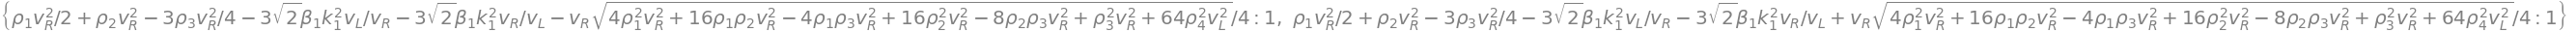

In [174]:
Mass_matrix_approximation(Mpp_square.subs(beta2, beta1)).eigenvals()

In [141]:
Mp_square_approx = Mass_matrix_approximation(Mp_square)
Mp_square_approx

⎡                                                           ⎛          2      
⎢                                                         2 ⎜ \alpha₂⋅k     \a
⎢                         0                            v_R ⋅⎜──────────── - ──
⎢                                                           ⎜   2       2     
⎢                                                           ⎝2⋅k  - 2⋅k₁    2⋅
⎢                                                                             
⎢     ⎛          2              2                   ⎞                         
⎢   2 ⎜ \alpha₂⋅k     \alpha₂⋅k₁     √2⋅\alpha₃⋅k⋅k₁⎟                         
⎢v_R ⋅⎜──────────── - ──────────── + ───────────────⎟                         
⎢     ⎜   2       2      2       2        2       2 ⎟                         
⎢     ⎝2⋅k  - 2⋅k₁    2⋅k  - 2⋅k₁      4⋅k  - 4⋅k₁  ⎠                         
⎢                                                                             
⎢                         0                         

In [142]:
Mp_square_approx.subs(k1,0)

⎡                         2      ⎤
⎢              \alpha₂⋅v_R       ⎥
⎢     0        ────────────  0  0⎥
⎢                   2            ⎥
⎢                                ⎥
⎢           2                    ⎥
⎢\alpha₂⋅v_R                     ⎥
⎢────────────       0        0  0⎥
⎢     2                          ⎥
⎢                                ⎥
⎢     0             0        0  0⎥
⎢                                ⎥
⎣     0             0        0  0⎦

In [140]:
Mpp_square_approx = Mass_matrix_approximation(Mpp_square)
Mpp_square_approx

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

## Yukawa charged lepton sector

In [106]:
from sympy import IndexedBase, Idx

In [107]:
#Indexed?

In [108]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [109]:
#ht[i, j]

In [110]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [111]:
nueL, nuL[i]

In [112]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [113]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [114]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [115]:
LY

Charged lepton mass

In [116]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [117]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [118]:
Ml = k*hij
Ml